## Importing Libraries

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0


## Loading dataset and Visualising

- The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. 
- train_images and test_images parts contain greyscale RGB codes (from 0 to 255) while train_labels and test_labels parts contains labels from 0 to 9 which represents which number they actually are. To visualize these numbers, we can get help from matplotlib.

In [2]:
# Loading
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# Defining class names
class_names = [ 'zero', 'one', 'two', 'three', 'four', 'five',
               'six', 'seven', 'eight', 'nine']

8


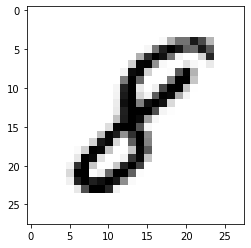

In [4]:
# Visualising
%matplotlib inline 

image_index = 7777 # You may select anything up to 60,000

print(train_labels[image_index]) # The label is 8

plt.imshow(train_images[image_index], cmap='Greys')

In [5]:
# Studying the data
print('Shape of train data: ', train_images.shape)
print('Shape of test data: ', test_images.shape)

Shape of train data:  (60000, 28, 28)
Shape of test data:  (10000, 28, 28)


- 60,000 represents the number of images in the train dataset
- (28, 28) represents the size of the image: 28 x 28 pixel.

## Normalizing the Images

- We must normalize our data as it is always required in neural network models.
- We can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code).

In [6]:
# Scaling
train_images = train_images / 255.0

test_images = test_images / 255.0

## Defining Callback

Writing an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. it should stop training once that level of accuracy is reached.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs= to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"


In [7]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True
        
callbacks = myCallback()

## Building Model

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, callbacks=[callbacks])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 177us/sample - loss: 0.1996 - acc: 0.9409
Epoch 2/10
60000/60000 [==============================] - 11s 177us/sample - loss: 0.0799 - acc: 0.9748
Epoch 3/10
60000/60000 [==============================] - 10s 159us/sample - loss: 0.0513 - acc: 0.9836 -
Epoch 4/10
60000/60000 [==============================] - 10s 166us/sample - loss: 0.0381 - acc: 0.9878
Epoch 5/10
59680/60000 [============================>.] - ETA: 0s - loss: 0.0258 - acc: 0.9919
Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 10s 164us/sample - loss: 0.0259 - acc: 0.9919


## Evaluating

In [9]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.0716 - acc: 0.9791

Test accuracy: 0.9791


## Predicting

In [10]:
predictions = model.predict(test_images)

## Verifying Predictions

In [11]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

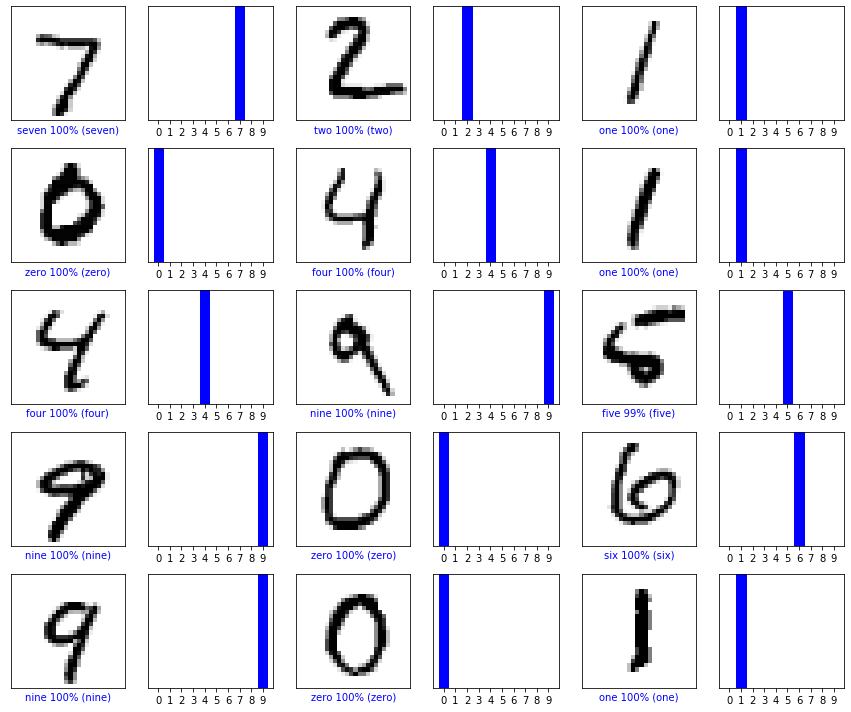

In [12]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()